In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Loading Dataset

In [2]:
cr = pd.read_csv(r"C:\Users\jbnay\Downloads\credit_card_default.csv")
cr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
cr.shape

(30000, 25)

2. EDA and Preprocessing

In [4]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
cr.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
cr.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
cr.drop(['ID'],axis=1,inplace=True)

In [8]:
cr.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

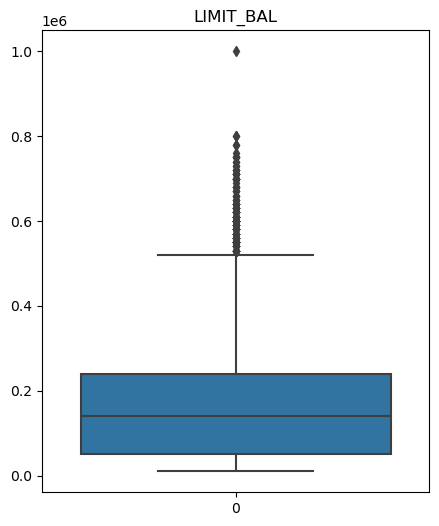

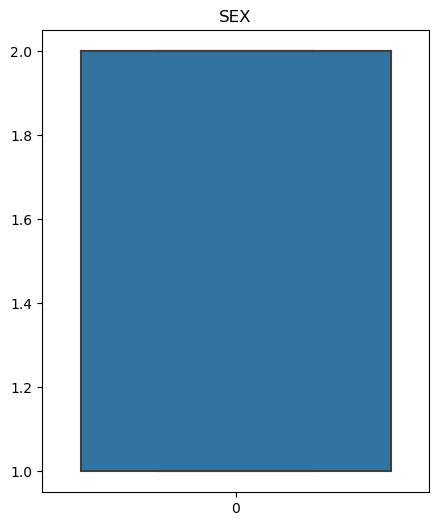

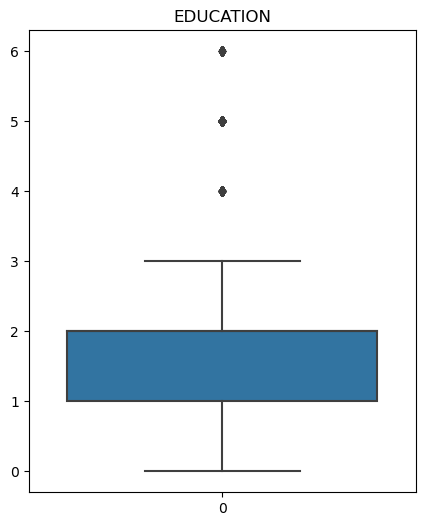

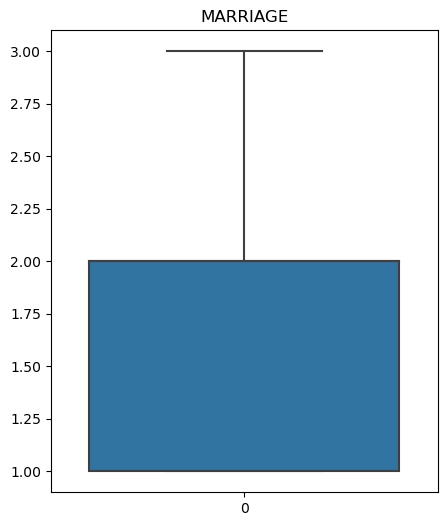

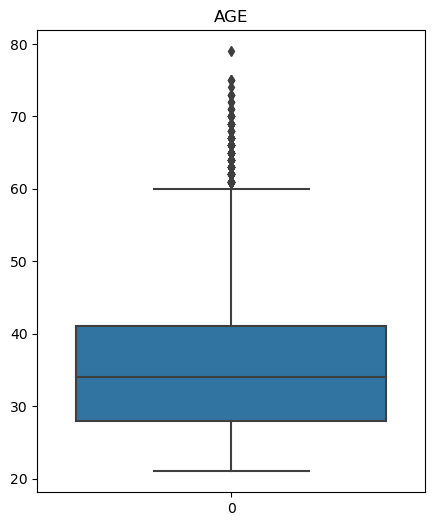

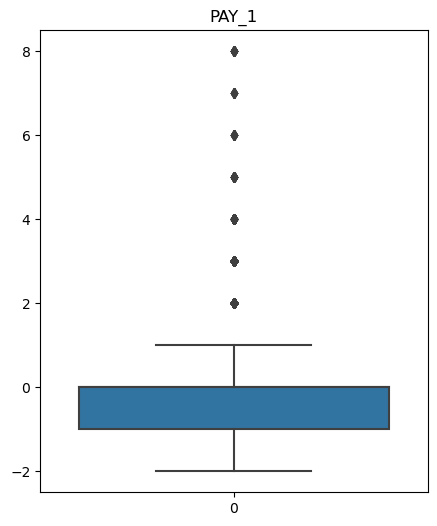

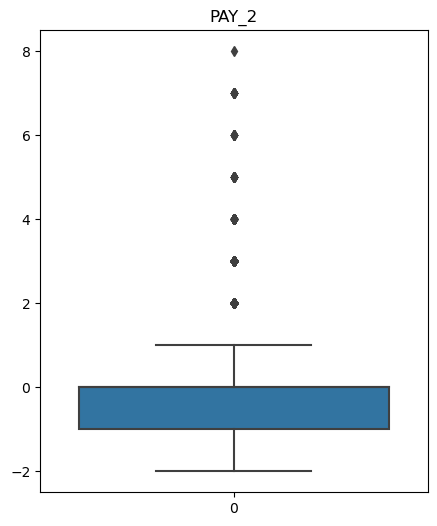

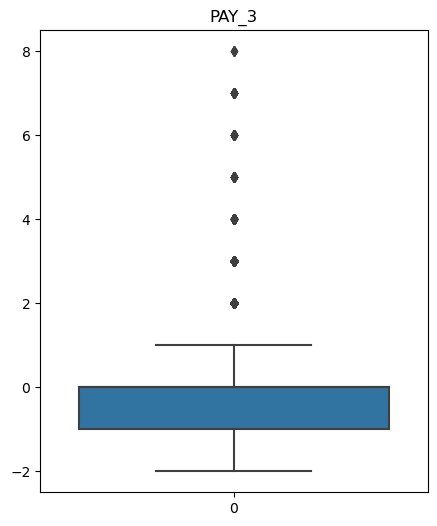

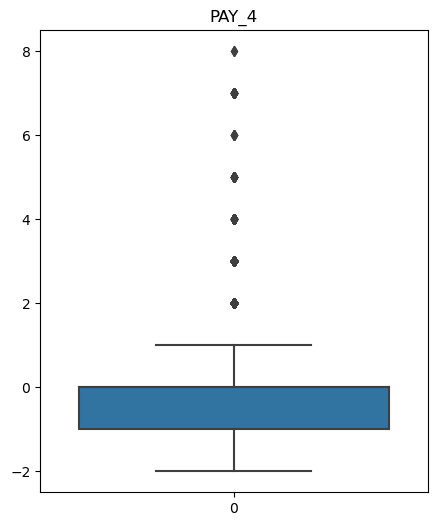

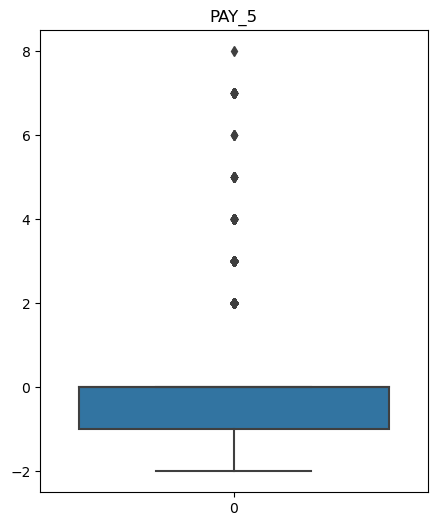

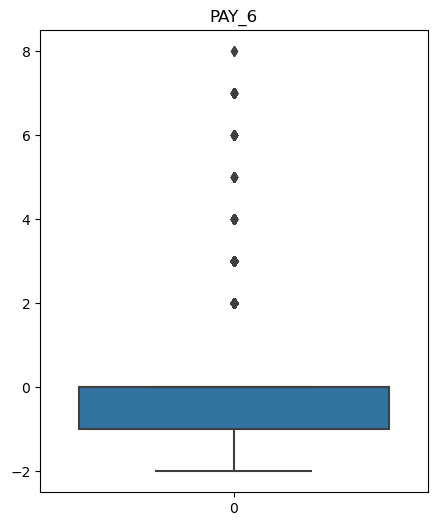

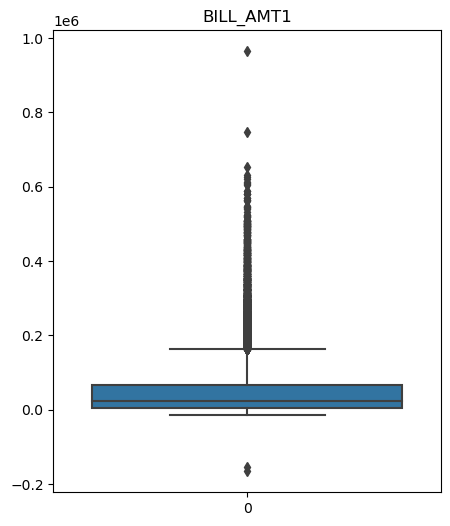

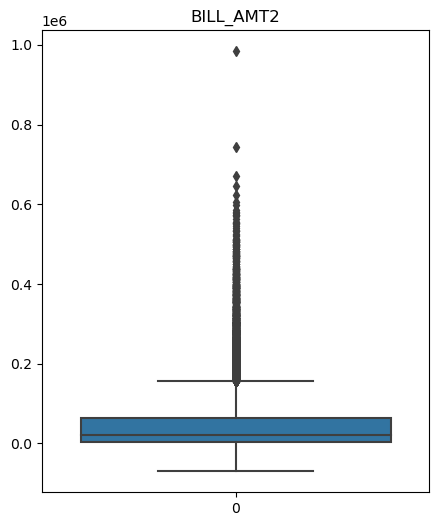

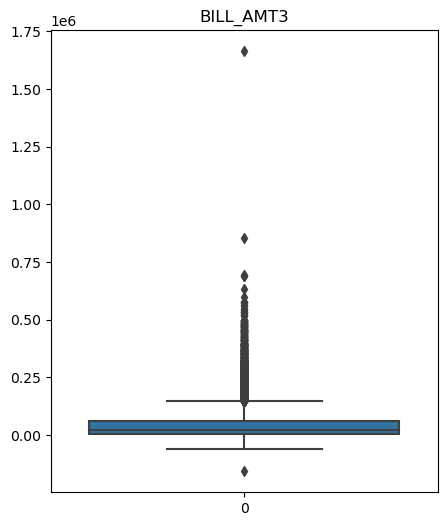

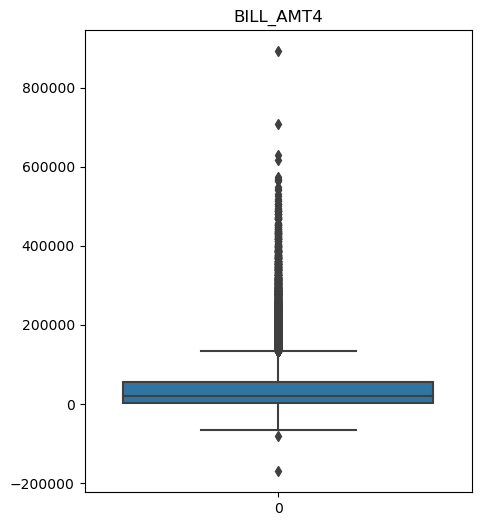

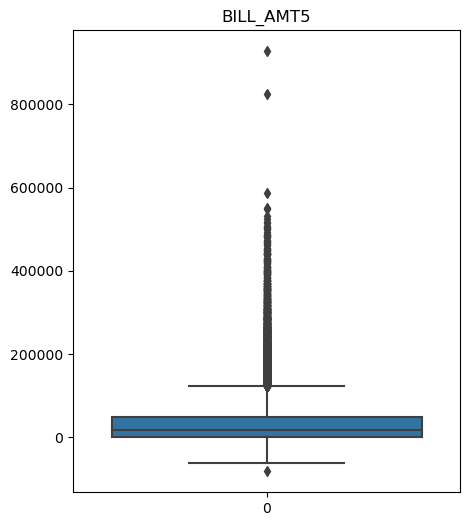

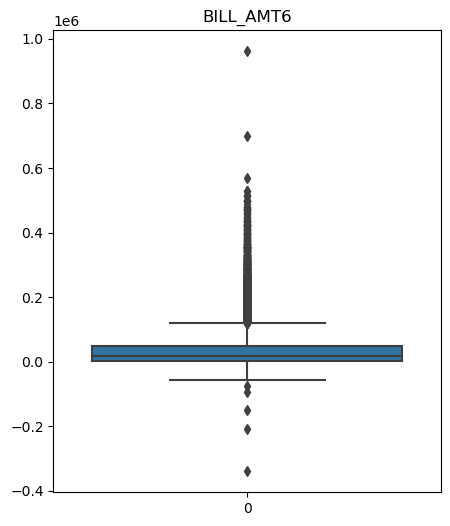

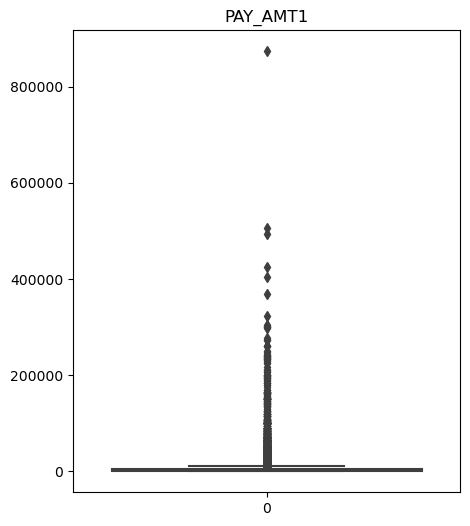

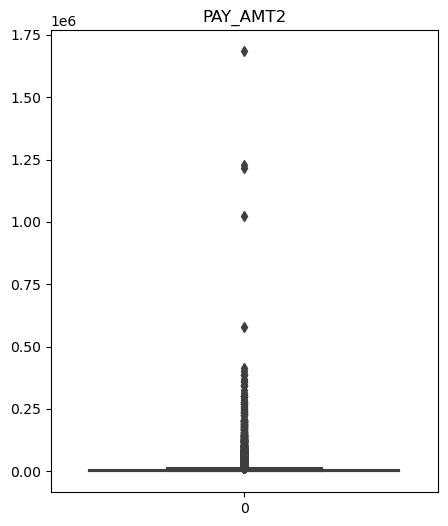

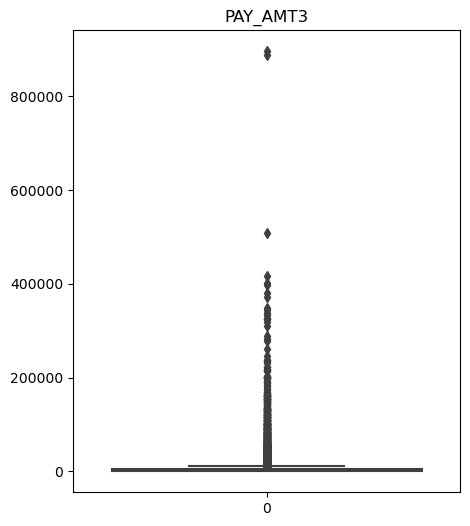

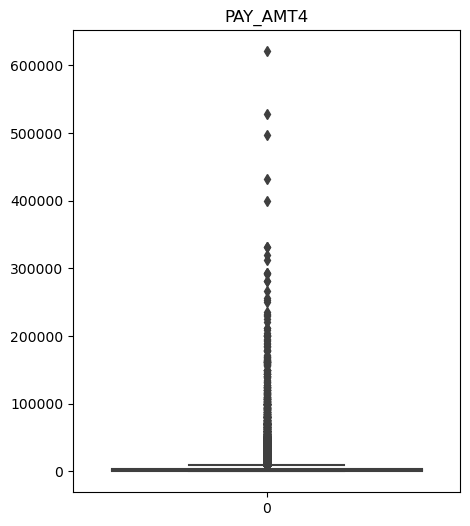

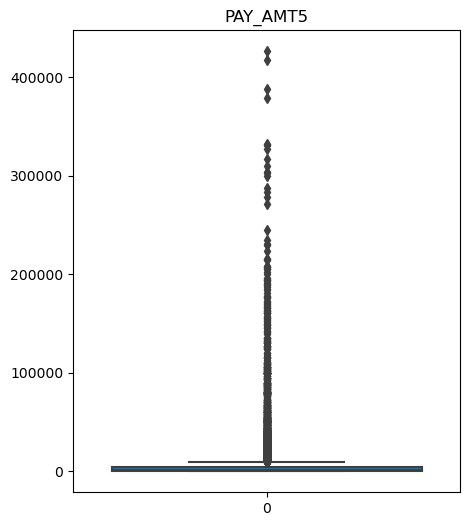

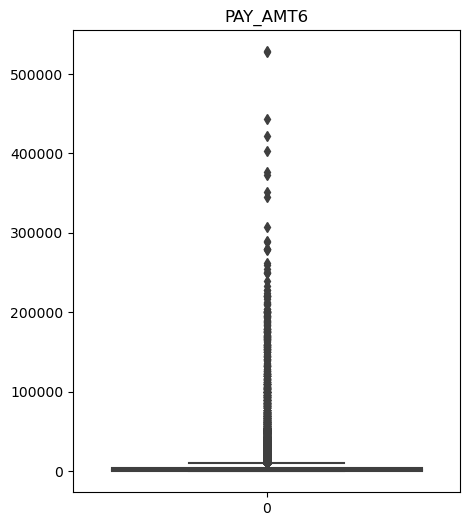

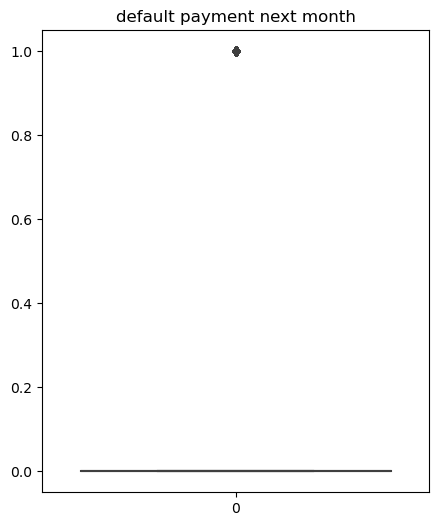

In [9]:
num_col=[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
for i in num_col:
    plt.figure(figsize=(5,6))
    sns.boxplot(cr[i])
    plt.title(i)
    plt.show()

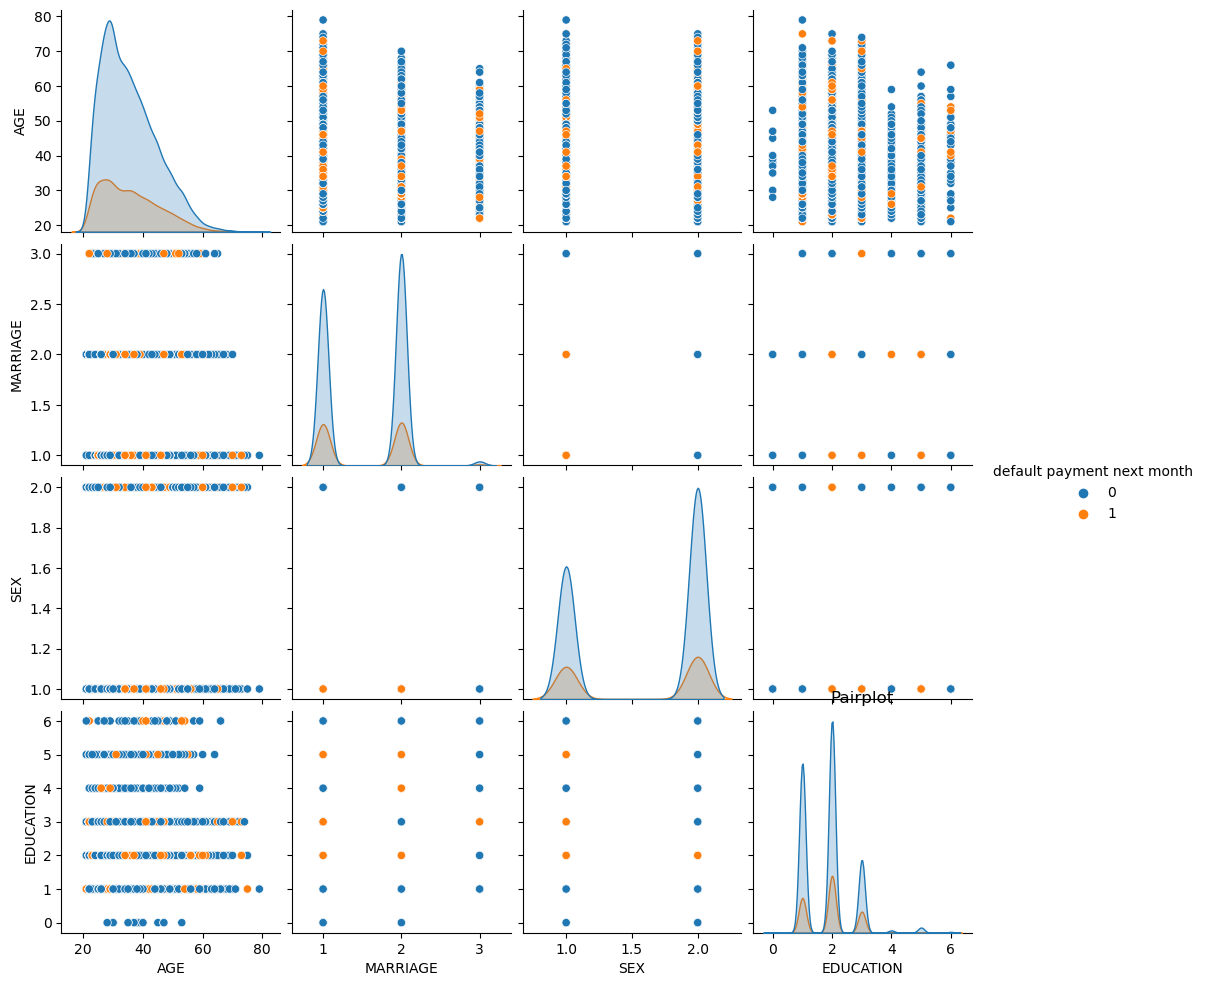

In [10]:
sns.pairplot(cr,hue='default payment next month',vars =['AGE','MARRIAGE','SEX','EDUCATION'])
plt.title('Pairplot')
plt.show()

In [13]:
#splitting dataset

x = cr.drop(['default payment next month'],axis=1)
y = cr['default payment next month']

In [14]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [15]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.25,random_state=42)

3. Modeling

In [16]:
#KNN classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
metric_k =[]
n = np.arange(3,15)


for k in n:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    pred_knn  = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_knn)
    metric_k.append(acc)

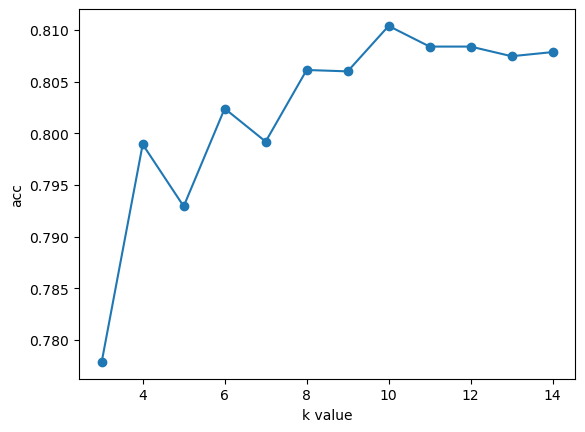

In [18]:
plt.plot(n,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('acc')
plt.show()

In [19]:
classifier = KNeighborsClassifier(n_neighbors = 14 ,metric = 'euclidean')
classifier.fit(x_train,y_train)
pred_knn  = classifier.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test, pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.8078666666666666


In [21]:
#svm


from sklearn.svm import SVC
sv = SVC(kernel = 'poly',degree =3)


In [22]:
sv.fit(x_train,y_train)

SVC(kernel='poly')

In [23]:
pred_sv = sv.predict(x_test)

In [24]:
accuracy = accuracy_score(y_test, pred_sv)
print("Accuracy:", accuracy)

Accuracy: 0.8072


In [25]:
#Random forest


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =100)

In [26]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
pred_rf = clf.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.8142666666666667


In [29]:
#implementing AdaBoosting

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators =100)
ada_clf.fit(x_train,y_train)
pred_ada = ada_clf.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test, pred_ada)
print("Accuracy:", accuracy)

Accuracy: 0.816


In [31]:
#implementing GradientBoosting

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100,max_depth =3,random_state=42)
gb_clf.fit(x_train,y_train)
pred_gb = clf.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test, pred_gb)
print("Accuracy:", accuracy)

Accuracy: 0.8142666666666667


In [33]:
#implementing XGBoosting

import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)
pred_xgb = clf.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test, pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.8142666666666667


In [40]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
model=RandomForestClassifier(n_estimators =100)
skfold=StratifiedKFold(n_splits=10)

In [41]:
skvc_result=cross_val_score(model,x,y,cv =skfold)
skvc_result

array([0.80366667, 0.80733333, 0.80666667, 0.808     , 0.81766667,
       0.82133333, 0.83333333, 0.827     , 0.821     , 0.81533333])

In [42]:
print('average cvs:{}'.format(skvc_result.mean()))

average cvs:0.8161333333333334


In [43]:
from sklearn import tree

max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
  score = cross_val_score(tree.DecisionTreeClassifier(max_depth = val),x,y,cv = skfold, scoring='accuracy')
  print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.820
Average score(2): 0.819
Average score(3): 0.821
Average score(4): 0.821
Average score(5): 0.820
Average score(6): 0.818
Average score(7): 0.816
Average score(8): 0.814
Average score(9): 0.812
Average score(10): 0.808


4. Hyperparameter tuning

In [44]:
parameters={'max_depth':[10,20,30,40,50,60,70,80,90,100],
           'criterion':['gini','entropy'],
           'n_estimators':[50,100,200,400,600]}

In [46]:
# randomizedSEARCH
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameters,
                                 verbose=1,n_jobs=-1,
                                 n_iter=50)
random_result = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [48]:
print('Best parameter:',random_result.best_params_)
print('Bestscore:',random_result.best_score_)


Best parameter: {'n_estimators': 50, 'max_depth': 10, 'criterion': 'entropy'}
Bestscore: 0.8201333333333333
